###### Handwritten Digit Recognition on MNIST dataset




Epoch 1/5


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2985 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1438 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1079 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9735
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0758 - accuracy: 0.9773
Test accuracy: 0.9772999882698059
313/313 [==============================] - 1s 1ms/step


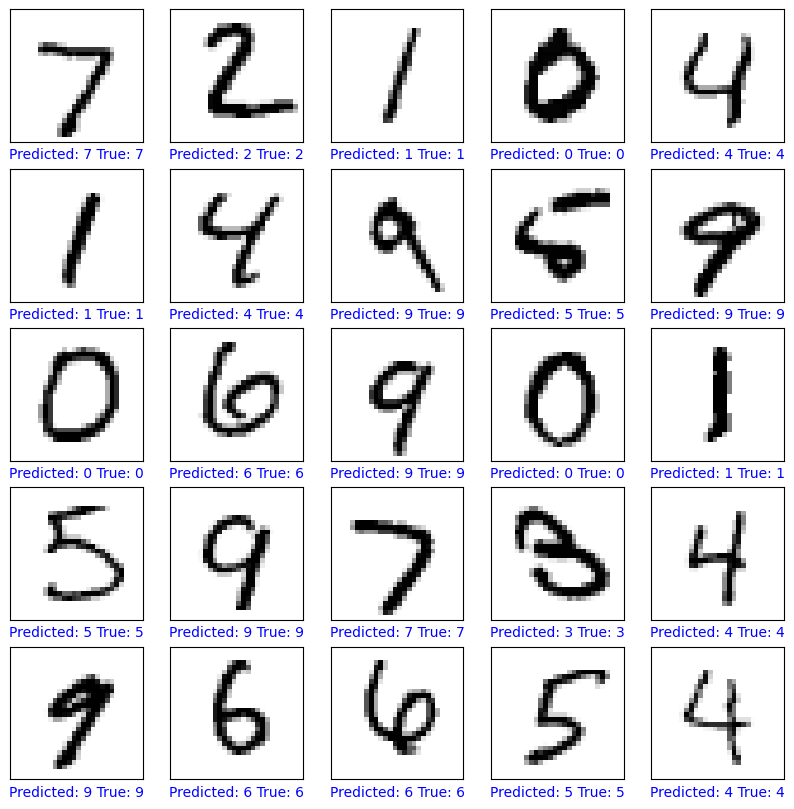

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the neural network model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Make predictions on some test images
predictions = model.predict(test_images)

# Display the first few test images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = test_labels[i].argmax()
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'Predicted: {predicted_label} True: {true_label}', color=color)

# Correct indentation for plt.show() to be outside the loop
plt.show()

